## Data Classes
Data classes represent a heterogeneous collection of variables, all rolled into a composite type. Composite types are made up of multiple values, and should always represent some sort of relationship or logical grouping. For example, a Fraction is an excellent example of a composite type. It contains two scalar values: a numerator and a denominator.

In [3]:
from dataclasses import dataclass

@dataclass
class MyFraction:
    numerator: int = 0
    denominator: int = 1

By building relationships like this, you are adding to the shared vocabulary in your codebase. Instead of developers always needing to implement each field individually, you instead provide a reusable grouping. Data classes force you to explicitly assign types to your fields, so there’s less chance of type confusion among maintainers.

Data classes and other user-defined types can be nested within the dataclass. Suppose I’m creating an automated soup maker and I need to group my soup ingredients together. Using dataclass, it looks like this:

In [6]:
!python --version

Python 3.7.11


> Warning: Following code do not work in python version < 3.8

In [ ]:
import datetime
from dataclasses import dataclass
from enum import auto, Enum

class ImperialMeasure(Enum):
    TEASPOON = auto()
    TABLESPOON = auto()
    CUP = auto()

class Broth(Enum):
    VEGETABLE = auto()
    CHICKEN = auto()
    BEEF = auto()
    FISH = auto()

@dataclass(frozen=True)
# Ingredients added into the broth
class Ingredient:
    name: str
    amount: float = 1
    units: ImperialMeasure = ImperialMeasure.CUP

@dataclass
class Recipe:
    aromatics: set[Ingredient]
    broth: Broth
    vegetables: set[Ingredient]
    meats: set[Ingredient]
    starches: set[Ingredient]
    garnishes: set[Ingredient]
    time_to_cook: datetime.timedelta

- A soup recipe is a set of grouped information. Specifically, it can be defined by its ingredients (separated into specific categories), the broth used, and how long it takes to cook.
- Each ingredient has a name and an amount you need for the recipe.
- You have enumerations to tell you about the soup broth and measures. These are not a relationship by themselves, but they do communicate intention to the reader.
- Each grouping of ingredients is a set, rather than a tuple. This means that the user can change these after construction, but still prevent duplicates.

To create the dataclass, I do the following:

In [ ]:
pepper = Ingredient("Pepper", 1, ImperialMeasure.TABLESPOON)
garlic = Ingredient("Garlic", 2, ImperialMeasure.TEASPOON)
carrots = Ingredient("Carrots", .25, ImperialMeasure.CUP)
celery = Ingredient("Celery", .25, ImperialMeasure.CUP)
onions = Ingredient("Onions", .25, ImperialMeasure.CUP)
parsley = Ingredient("Parsley", 2, ImperialMeasure.TABLESPOON)
noodles = Ingredient("Noodles", 1.5, ImperialMeasure.CUP)
chicken = Ingredient("Chicken", 1.5, ImperialMeasure.CUP)

chicken_noodle_soup = Recipe(
    aromatics={pepper, garlic},
    broth=Broth.CHICKEN,
    vegetables={celery, onions, carrots},
    meats={chicken},
    starches={noodles},
    garnishes={parsley},
    time_to_cook=datetime.timedelta(minutes=60))

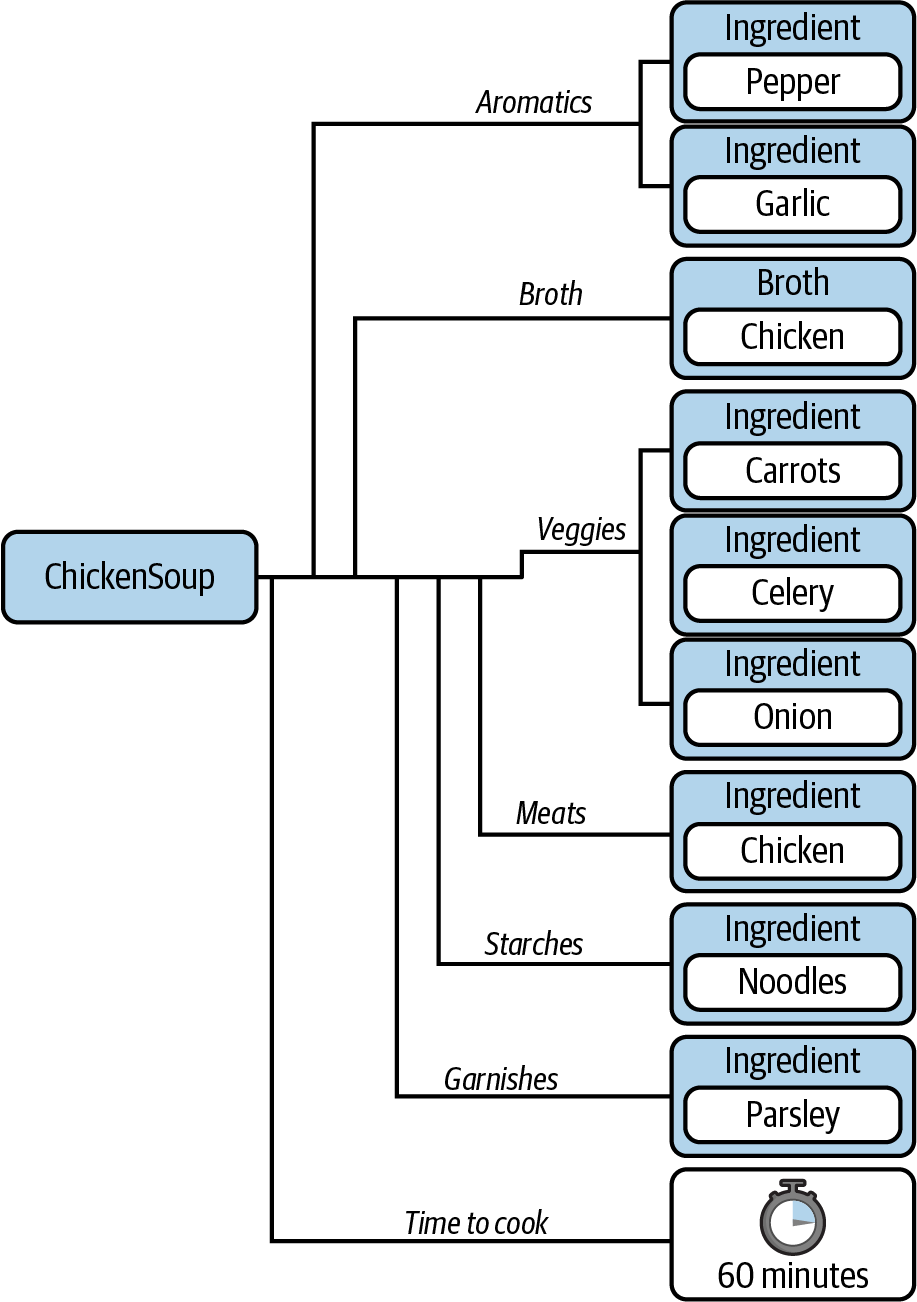